# KNN method

In [6]:
# import numpy as np
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve
import matplotlib.pyplot as plt

In [7]:
###load data first
def f(x):
    return np.int(x)
f2 = np.vectorize(f)

features = np.loadtxt("features.txt", delimiter=",")
labels = np.loadtxt("labels.txt", delimiter=",")
x_vals = features
y_vals = f2(labels)
print(x_vals, y_vals)
# one hot encoding
y_vals = np.eye(len(set(y_vals)))[y_vals]
# normalize
x_vals = (x_vals - x_vals.min(0)) / x_vals.ptp(0)
# split data
x_vals_train, x_vals_test, y_vals_train, y_vals_test = train_test_split(x_vals, y_vals)
feature_number = len(x_vals_train[0])

[[151.  59.  54. ... 143. 127. 127.]
 [153.  59.  61. ... 142. 129. 128.]
 [154.  48.  60. ... 137. 123. 125.]
 ...
 [145.  52.  62. ... 143. 124. 128.]
 [145.  53.  59. ... 142. 126. 128.]
 [144.  53.  54. ... 145. 124. 125.]] [1 1 1 ... 0 0 0]


0.0008361204013377926
0.0016722408026755853
0.002508361204013378
0.0033444816053511705
0.004180602006688963
0.005016722408026756
0.005852842809364548
0.006688963210702341
0.007525083612040134
0.008361204013377926
0.00919732441471572
0.010033444816053512
0.010869565217391304
0.011705685618729096
0.01254180602006689
0.013377926421404682
0.014214046822742474
0.015050167224080268
0.01588628762541806
0.016722408026755852
0.017558528428093644
0.01839464882943144
0.019230769230769232
0.020066889632107024
0.020903010033444816
0.021739130434782608
0.0225752508361204
0.023411371237458192
0.024247491638795988
0.02508361204013378
0.025919732441471572
0.026755852842809364
0.027591973244147156
0.028428093645484948
0.029264214046822744
0.030100334448160536
0.030936454849498328
0.03177257525083612
0.03260869565217391
0.033444816053511704
0.034280936454849496
0.03511705685618729
0.03595317725752508
0.03678929765886288
0.03762541806020067
0.038461538461538464
0.039297658862876256
0.04013377926421405
0.0

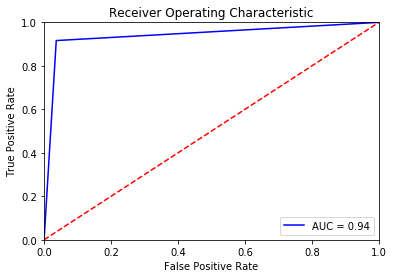

In [8]:
# test different k later
k = 5

x_data_train = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, len(y_vals[0])], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, feature_number], dtype=tf.float32)

# manhattan distance
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

# nearest k points
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)


# manhattan distance
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

# nearest k points
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

sess = tf.Session()
prediction_outcome = sess.run(prediction, feed_dict={x_data_train: x_vals_train,
                               x_data_test: x_vals_test,
                               y_data_train: y_vals_train})

# evaluation
accuracy = 0
for pred, actual in zip(prediction_outcome, y_vals_test):
    if pred == np.argmax(actual):
        accuracy += 1

        print(accuracy / len(prediction_outcome))
        
print(prediction_outcome, y_vals_test)

con_mat = confusion_matrix(y_vals_test[:,1], prediction_outcome)
print("Confusion Matrix is: ", con_mat)
    
#ROC curve
fpr, tpr, threshold = roc_curve(y_vals_test[:,1], prediction_outcome)
roc_auc = auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()